<a href="https://colab.research.google.com/github/ikerarana/Machine-Learning-Notebooks/blob/master/1_RegresionLineal_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
########## IMPORTAMOS LAS LIBRERIAS #############

import tensorflow as tf
import numpy
from sklearn import datasets
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [0]:
########### PARAMETROS DEL MODELO #############

# generamos un numero aleatorio
rng = numpy.random

# Parametros
ratioAprendizaje = 0.01
numeroDeIteraciones = 1500
iteracionActual = 50

In [0]:
########## CARGA DE DATOS ############

# datos del dataset
boston = datasets.load_boston()

# recogemos la variable de la columna 5, numero medio de habitaciones por vivienda
X = boston.data[:,4]

# recogemos la variable a predecir
Y= boston.target

######## DATOS DEL MODELO ORIGINAL ##########

# entrenamiento_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
#                          7.042,10.791,5.313,7.997,5.654,9.27,3.1])
# entrenamiento_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
#                          2.827,3.465,1.65,2.904,2.42,2.94,1.3])

############################################

# las convertimos a array de numpy
entrenamiento_X = numpy.asarray(X)
entrenamiento_Y = numpy.asarray(Y)

# escalamos las variables
entrenamiento_X = preprocessing.scale(entrenamiento_X)
entrenamiento_Y = preprocessing.scale(entrenamiento_Y)

# sacamos el numero de muestras
numMuestras = entrenamiento_X.shape[0]

# le decimos que trabaje los conjuntos de datos como float
X = tf.placeholder("float")
Y = tf.placeholder("float")


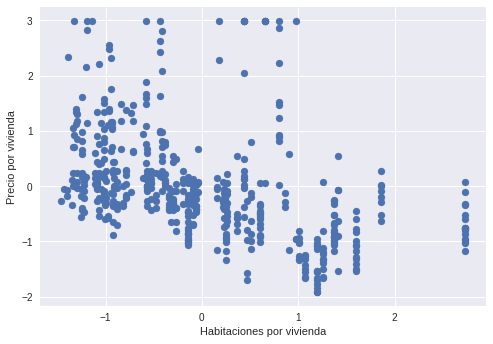

In [0]:
############### PREVISUALIZACION DE LOS DATOS ##############

#pintamos las variables en una grafica
plt.scatter(entrenamiento_X,entrenamiento_Y)
plt.xlabel("Habitaciones por vivienda")
plt.ylabel("Precio por vivienda")
plt.show()

In [0]:
################## INICIALIZAMOS EL MODELO #########################

# le decimos que trabaje los conjuntos de datos como float
X = tf.placeholder("float")
Y = tf.placeholder("float")

# creamos las variables weight y bias
# las inicalizamos en aleatorio y les ponemos nombre
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# construimos un modelo lienal
prediccion = tf.add(tf.multiply(X, W), b)

# Creamos la funcion de conste
coste = tf.reduce_sum(tf.pow(prediccion-Y, 2))/(2*numMuestras)

# usamos el descenso del gradiente
optimizador = tf.train.GradientDescentOptimizer(ratioAprendizaje).minimize(coste)

# inicializamos las variables
init = tf.global_variables_initializer()

# pintar variables W y b
with tf.Session() as ses:
  ses.run(init)
  print(" W = ", ses.run(W))
  print(" b = ", ses.run(b))

 W =  0.27486187
 b =  -0.902939


Iteracion: 0050 Valor de la funcion de coste= 0.648149312 Peso del parametro --> W= -0.0024960067 Bias o parametro independeinte--> b= -0.5462834
Iteracion: 0100 Valor de la funcion de coste= 0.496345222 Peso del parametro --> W= -0.1702992 Bias o parametro independeinte--> b= -0.33050472
Iteracion: 0150 Valor de la funcion de coste= 0.440780014 Peso del parametro --> W= -0.27182114 Bias o parametro independeinte--> b= -0.19995736
Iteracion: 0200 Valor de la funcion de coste= 0.420441389 Peso del parametro --> W= -0.3332425 Bias o parametro independeinte--> b= -0.120975435
Iteracion: 0250 Valor de la funcion de coste= 0.412996769 Peso del parametro --> W= -0.37040284 Bias o parametro independeinte--> b= -0.073190875
Iteracion: 0300 Valor de la funcion de coste= 0.410271764 Peso del parametro --> W= -0.3928851 Bias o parametro independeinte--> b= -0.044280928
Iteracion: 0350 Valor de la funcion de coste= 0.409274429 Peso del parametro --> W= -0.406487 Bias o parametro independeinte--> b

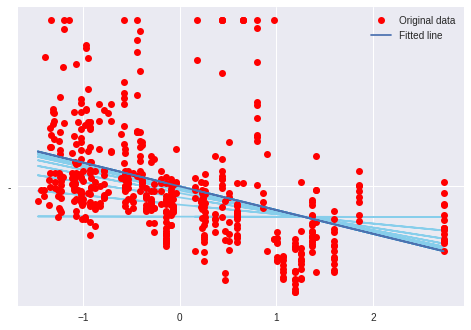

In [0]:
################ ENTRENAMIENTO DEL MODELO ###################

# empezamos el entrenamiento
with tf.Session() as sess:
    # corremos el modelo
    sess.run(init)

    # iteramos
    for epoch in range(numeroDeIteraciones):

        # corremos el grafo hasta la funcion de optimizacion con los parametros X e Y
        # eb esta funcion, tambien se actualiza la funcion de coste, ya que esta, depende del optimizador
        sess.run(optimizador, feed_dict={X: entrenamiento_X, Y: entrenamiento_Y})

        # Cada 50 iteraciones, pintamos
        if (epoch + 1) % iteracionActual == 0:
          
            # calculamos el valor de la funcion de coste
            c = sess.run(coste, feed_dict={X: entrenamiento_X, Y: entrenamiento_Y})

            # pintamos
            print("Iteracion:", '%04d' % (epoch + 1), "Valor de la funcion de coste=", "{:.9f}".format(c), \
                  "Peso del parametro --> W=", sess.run(W), "Bias o parametro independeinte--> b=", sess.run(b))
            
            # pintamos una linea azul con el valor de los parametros en cada iteracion
            plt.plot(entrenamiento_X, sess.run(W) * entrenamiento_X + sess.run(b), 'skyblue', "-")

    # pintamos la ultima linea de la optimizacion
    print("Optimizacion finalizada!")
    training_cost = sess.run(coste, feed_dict={X: entrenamiento_X, Y: entrenamiento_Y})
    
    # pintamos los valores finales de los parametros
    print("Valor final de la funcion de coste=", training_cost, "Peso del parametro --> W=", sess.run(W), 
          "Bias o parametro independeinte--> b=", sess.run(b), '\n')

    ########### PINTAMOS LOS DATOS #############
    # Graficamos un plot de puntos rojos con los datos originales
    plt.plot(entrenamiento_X, entrenamiento_Y, 'ro', label='Original data')
    
    # graficamos una linea con la recta ajustada a los datos en funcion de los parametros
    plt.plot(entrenamiento_X, sess.run(W) * entrenamiento_X + sess.run(b), label='Fitted line')
    
    # pintamos la leyenda y mostramos
    plt.legend()
    plt.show()